# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Hanny
- **Email:** ristianhanny03@gmail.com
- **ID Dicoding:** hanhanhanny

## Menentukan Pertanyaan Bisnis

1. Bagaimana trend penjualan dalam rentang waktu tertentu?
2. Bagaimana persebaran state dari para customer dan state mana yang memiliki customer paling banyak?
3. Berapa persentase barang telah sampai ke customer sebelum order_estimated_delivery_date?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib
import matplotlib.image as mpimg
from scipy import stats
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
# memuat tabel customers
customer_df = pd.read_csv("https://raw.githubusercontent.com/hanhanhanny/E-CommercePublic-Hanny/main/dataset/customers_dataset.csv")
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
# memuat tabel orders
order_df = pd.read_csv("https://raw.githubusercontent.com/hanhanhanny/E-CommercePublic-Hanny/main/dataset/orders_dataset.csv")
order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
# memuat tabel geolocation
geolocation_df = pd.read_csv("https://raw.githubusercontent.com/hanhanhanny/E-CommercePublic-Hanny/main/dataset/geolocation_dataset.csv")
geolocation_df.head()

<ipython-input-50-f3aa95d98249>:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  geolocation_df = pd.read_csv("https://raw.githubusercontent.com/hanhanhanny/E-CommercePublic-Hanny/main/dataset/geolocation_dataset.csv")


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state;
0,1037,-23.55,-46.62,sao paulo,SP;
1,1046,-23.55,-46.66,sao paulo,SP;
2,1046,-23.55,-46.66,sao paulo,SP;
3,1041,-23.55,-46.62,sao paulo,SP;
4,1035,-23.55,-46.66,sao paulo,SP;


### Assessing Data

In [ ]:
# customer_df
print(customer_df.isna().sum())
print("Jumlah duplikasi: ", customer_df.duplicated().sum())

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
Jumlah duplikasi:  0


Pada tabel customer_df tidak ada data yang null ataupun duplikat

In [ ]:
# order_df
print(order_df.info())
print(order_df.isna().sum())
print("Jumlah duplikasi: ", order_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date

Pada tabel order_df terdapat missing value yaitu pada kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date. Namun tidak ada jumlah duplikasi

In [ ]:
# geolocation_df
print(geolocation_df.info())
print(geolocation_df.isna().sum())
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  object 
 1   geolocation_lat              1000161 non-null  float64
 2   geolocation_lng              1000161 non-null  float64
 3   geolocation_city             1000161 non-null  object 
 4   geolocation_state;           1000161 non-null  object 
dtypes: float64(2), object(3)
memory usage: 38.2+ MB
None
geolocation_zip_code_prefix    0
geolocation_lat                2
geolocation_lng                2
geolocation_city               2
geolocation_state;             2
dtype: int64
Jumlah duplikasi:  914319


Pada tabel geolocation_df terdapat 2 missing value pada kolom geolocation_lat, geolocation_lng, geolocation_city, dan geolocation_state. Dan juga terdapat cukup banyak duplikasi pada data tersebut.

### Cleaning Data

In [ ]:
# order_df
null_delivered_customer_count = order_df['order_delivered_customer_date'].isnull().sum()
total_order_rows = order_df.shape[0]
null_delivered_customer_percentage = (null_delivered_customer_count/total_order_rows)*100
print("Persentase jumlah nilai null pada kolom order_delivered_customer_date : {:.2f}%".format(null_delivered_customer_percentage))

Persentase jumlah nilai null pada kolom order_delivered_customer_date : 2.98%


Karena total nilai null pada kolom order_delivered_customer_date hanya sebesar 2.98% maka saya memutuskan untuk drop nilai null pada kolom tersebut.

In [ ]:
order_df_clean = order_df.dropna(subset=['order_delivered_customer_date'])
order_df_clean.isna().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      1
order_delivered_customer_date     0
order_estimated_delivery_date     0
dtype: int64

Drop data yang null pada order_approved_at dan juga order_delivered_carrier_date

In [ ]:
order_df_clean = order_df_clean.dropna(subset=['order_approved_at'])
order_df_clean = order_df_clean.dropna(subset=['order_delivered_carrier_date'])
order_df_clean.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

Karena kita perlu cek apakah order telah sampai di customer tepat waktu sebelum estimated delivery date, maka perlu ada kolom baru yang berisi apakah order On Time atau Late.

In [ ]:
order_df_clean['delivered_on_time'] = np.where(order_df_clean['order_delivered_customer_date'] < order_df_clean['order_estimated_delivery_date'], 'On Time', 'Late')
order_df_clean.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_on_time
48929,665d50e18511ae7a38d58eded8c03b60,b636ce46b14f0aac0e905d9410c0c3a9,delivered,2018-05-02 21:37:33,2018-05-02 22:34:52,2018-05-04 12:09:00,2018-05-20 18:21:27,2018-06-08 00:00:00,On Time
65776,a14a2e543b33add9891cabe38fd844c8,84c391f6583d7b5bd71ead8b85f36d31,delivered,2018-04-15 10:55:24,2018-04-15 11:10:27,2018-04-17 18:03:30,2018-05-10 18:48:53,2018-05-15 00:00:00,On Time
69381,bed08b58982cd12128ec33bb7aae000a,e51d4d833af20d1989f1b1bd3e7c1d2f,delivered,2018-01-24 21:35:23,2018-01-24 21:56:48,2018-01-25 17:09:34,2018-01-31 22:08:12,2018-02-23 00:00:00,On Time
14004,7c921161980003eac272f619f2fa5776,c155fc0c74e24ef74f2f62258b8c4bbc,delivered,2017-08-10 00:17:45,2017-08-10 00:30:16,2017-08-15 21:15:53,2017-08-26 14:19:59,2017-09-11 00:00:00,On Time
79279,645a389e60ffe5af0bdc4800a14c36e2,dfa2fabfd09898113c191770dd4c9c96,delivered,2017-11-08 11:42:13,2017-11-09 05:31:35,2017-11-16 22:51:09,2017-11-30 17:21:33,2017-11-29 00:00:00,Late


Pada kolom 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', dan 'order_estimated_delivery_date' perlu diubah menjadi tipe data datetime

In [ ]:
order_df_clean['order_purchase_timestamp'] = pd.to_datetime(order_df_clean['order_purchase_timestamp'])
order_df_clean['order_approved_at'] = pd.to_datetime(order_df_clean['order_approved_at'])
order_df_clean['order_delivered_carrier_date'] = pd.to_datetime(order_df_clean['order_delivered_carrier_date'])
order_df_clean['order_delivered_customer_date'] = pd.to_datetime(order_df_clean['order_delivered_customer_date'])
order_df_clean['order_estimated_delivery_date'] = pd.to_datetime(order_df_clean['order_estimated_delivery_date'])

In [ ]:
# geolocation_df
geolocation_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  0


## Exploratory Data Analysis (EDA)

### Explore Data Customer

In [ ]:
customer_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
69171,22a62541ed4704ac4f51d175379222d7,1803287d1e7138aec6ea9d3c963ed87d,8557,poa,SP
97294,4bf97f85728e222d60123b493dec288b,8dc76fe978df620b32ab5a6ac4791f4d,55315,correntes,PE
60185,e52f81b8d0a4cfd33af7ea579e68316d,e5e9da3a61436d34efc3250a52495330,81820,curitiba,PR
77368,1c489feb0e580cc8e3efaeadb2a9caa1,74ff394db4e98c42e572c43e516b6552,22050,rio de janeiro,RJ
16286,28d96ae4cad002111e2ff13d60458c86,25ec47585ccea752254b5a57a0cf41d6,84350,ortigueira,PR


In [ ]:
customer_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [ ]:
customer_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

Dari output diatas, diketahui bahwa mayoritas customer berasal dari kota sao paulo dengan state SP

### Explore Data Order

In [ ]:
order_df_clean.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_on_time
15930,bab4194a4df4aac8d2cf6386c4979973,f1dd712d9b2488021a1b70d1eec1f51e,delivered,2018-05-16 11:28:56,2018-05-16 11:58:02,2018-05-17 19:11:00,2018-05-18 22:11:35,2018-05-29,On Time
80189,e5ab0577510f6cf1d376b14deab49b24,c2965054d8e754a1265437c9b79bea95,delivered,2018-06-22 03:14:17,2018-06-26 04:59:15,2018-06-26 14:13:00,2018-07-06 11:14:48,2018-07-19,On Time
28630,491e593aee916fa4bf7b6cabb2f80070,092770113dc0bfba2c362dba9b7903cb,delivered,2018-08-02 12:32:36,2018-08-02 13:23:49,2018-08-03 12:20:00,2018-08-07 21:04:25,2018-08-17,On Time
14162,300e2dfe7d37393693973f78426a0807,9890637cbb5c311fb67564a3f6b09ed4,delivered,2017-08-11 13:05:16,2017-08-11 13:23:43,2017-08-14 19:12:35,2017-08-15 17:25:02,2017-08-24,On Time
59112,0b886faaea82e30898a5dbf0ffa73e51,4df063e444386a404859f4d9bdbb5063,delivered,2017-10-14 20:30:30,2017-10-17 03:49:22,2017-10-17 23:02:57,2017-10-26 00:44:00,2017-11-03,On Time


In [ ]:
order_df_clean['delivered_on_time'].describe()

count       96461
unique          2
top       On Time
freq        88635
Name: delivered_on_time, dtype: object

Dari hasil diatas menunjukkan bahwa terdapat 88635 order yang di deliver tepat waktu dari total sebanyak 96461 order.

### Explore Data Geolocation

In [ ]:
geolocation_df.sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state;
773525,68738,-1.355,-47.60,santa maria do para,PA;
739346,60060,-3.723,-38.53,fortaleza,CE;
795133,74085,-16.690,-49.25,goiânia,GO;
760919,65625,-4.156,-42.94,duque bacelar,MA;
769013,68182,-4.240,-56.00,itaituba,PA;


In [ ]:
geolocation_df.groupby('geolocation_zip_code_prefix').size().sort_values(ascending=False)

geolocation_zip_code_prefix
68900    103
68901     86
68908     84
68902     66
6900      63
        ... 
9951       1
59613      1
9943       1
45104      1
29378      1
Length: 19129, dtype: int64

Data diatas menunjukkan zip_code terbanyak terdapat pada 68900

### Explore All Data

- Merge cutomers & orders

In [ ]:
customers_orders_df = pd.merge(
    left=order_df_clean,
    right=customer_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
customers_orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_on_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,On Time,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,On Time,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,On Time,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,On Time,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,On Time,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


- merge with geolocation

In [ ]:
customers_orders_df.shape[0]

96461

In [ ]:
fixed_df = pd.merge(
    left=customers_orders_df,
    right=geolocation_df,
    how="left",
    left_on="customer_zip_code_prefix",
    right_on="geolocation_zip_code_prefix"
)
fixed_df = fixed_df.drop_duplicates(subset=['customer_id'])
fixed_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_on_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state;
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,On Time,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149,-23.58,-46.60,sao paulo,SP;
2,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,On Time,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,NaN,NaN,NaN,NaN,NaN
3,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,On Time,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,75265,-16.75,-48.50,vianopolis,GO;
9,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,On Time,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,NaN,NaN,NaN,NaN,NaN
10,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,On Time,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,9195,-23.67,-46.53,santo andre,SP;


In [ ]:
fixed_df.to_csv('main_data.csv', index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana trend penjualan dalam rentang waktu tertentu?

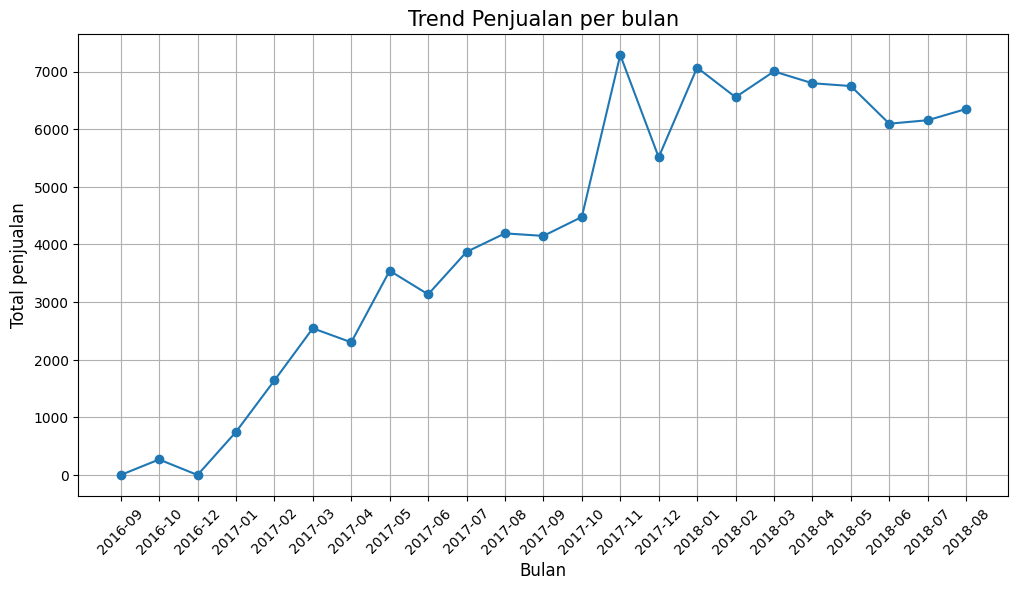

In [ ]:
fixed_df['order_month'] = fixed_df['order_purchase_timestamp'].dt.to_period('M')
monthly_order = fixed_df.groupby('order_month')['order_id'].nunique()
plt.figure(figsize=(12, 6))
plt.plot(monthly_order.index.astype(str), monthly_order.values, marker='o')
plt.title('Trend Penjualan per bulan', fontsize=15)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Total penjualan', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Pertanyaan 2: Bagaimana persebaran state dari para customer dan state mana yang memiliki customer paling banyak?

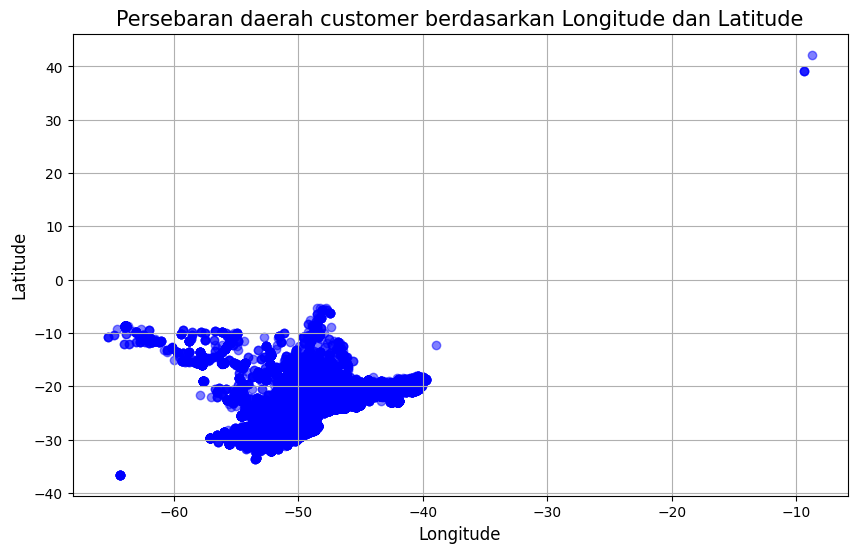

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(fixed_df['geolocation_lng'], fixed_df['geolocation_lat'], marker='o', c='blue', alpha=0.5)
plt.title('Persebaran daerah customer berdasarkan Longitude dan Latitude', fontsize=15)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(True)
plt.show()

<ipython-input-129-f2885913e35b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


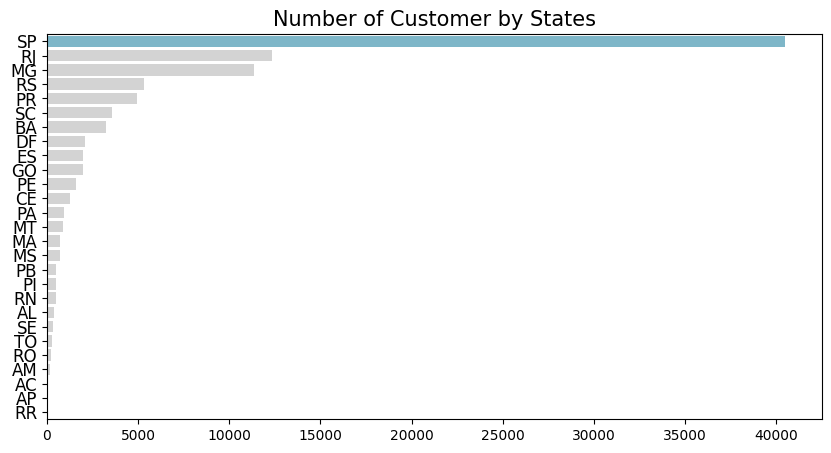

In [ ]:
bystate_df = fixed_df.groupby(by="customer_state")['customer_id'].nunique().reset_index()
bystate_df.rename(columns={
    "customer_id":"customer_count"
}, inplace=True)

plt.figure(figsize=(10, 5))
colors_ = ["#D3D3D3"] * len(bystate_df)
colors_[0] = "#72BCD4"
sns.barplot(
    x="customer_count",
    y="customer_state",
    data=bystate_df.sort_values(by="customer_count", ascending=False),
    palette=colors_
)
plt.title("Number of Customer by States", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

### Pertanyaan 3: Berapa persentase barang telah sampai ke customer sebelum order_estimated_delivery_date?

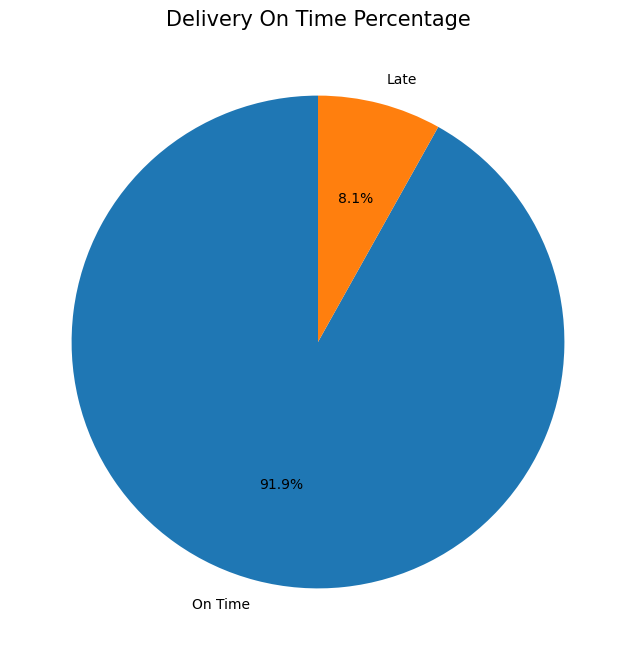

In [ ]:
on_time_counts = fixed_df['delivered_on_time'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(on_time_counts, labels=on_time_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Delivery On Time Percentage', fontsize=15)
plt.show()

## Conclusion

1. Dari hasil visualisasi tren penjualan per bulannya, menunjukkan bahwa garis trend cenderung ke arah positif atau dari kiri ke kanan atas. Hal ini menunjukkan bahwa total penjualan menunjukkan kenaikan yang cukup signifikan
2. Pada persebaran state dari para customer menunjukkan kecenderungan customer untuk berkumpul pada satu titik yaitu pada rentang longitude -60 hingga -40 dan latitude pada rentang -30 hingga -10. Dan state yang terletak pada rentang tersebut adalah SP atau sao paulo.
3. Dengan membandingkan jumlah barang yang tepat waktu sampai pada customer dengan jumlah keseluruhan order yang dilakukan customer menunjukkan persentase sampainya barang tepat waktu sebesar 91.9%